In [ ]:
# 1. Import libraries and file. 
# 2. Creation of visualizations.

In [ ]:
# Import libraries, the last three for data visualizations
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
# define path
path = r'C:\Users\Administrator\Documents\data analytics\Instacart Basket Analysis\02 Data\Prepared data'

In [92]:
# import ords_prods_custs. I call it opc to have a short name.
opc = pd.read_pickle(os.path.join(path, 'ords_prods_custs.pkl'))

In [93]:
opc.shape

(32641268, 32)

In [94]:
# Check what values to expect.
opc['spending_flag'].unique()

array(['High spender', 'Low spender'], dtype=object)

In [95]:
list(opc.columns)

['order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'validation',
 'product_id',
 'add_to_cart_order',
 'reordered',
 '_merge',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest day',
 'busiest_hour',
 'max_order',
 'average_price',
 'spending_flag',
 'loyalty_flag',
 'avg_price',
 'frequency_flag',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 'region']

In [96]:
# (7)Create an income flag for the customers based on income level
opc.loc[opc['income'] < 100000, 'income_group'] = 'LOW'
opc.loc[(opc['income'] >= 100000) & (opc['income'] <= 300000), 'income_group'] = 'MIDDLE'
opc.loc[opc['income'] > 300000, 'income_group'] = 'HIGH'

In [97]:
list(opc.columns)

['order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'validation',
 'product_id',
 'add_to_cart_order',
 'reordered',
 '_merge',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest day',
 'busiest_hour',
 'max_order',
 'average_price',
 'spending_flag',
 'loyalty_flag',
 'avg_price',
 'frequency_flag',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 'region',
 'income_group']

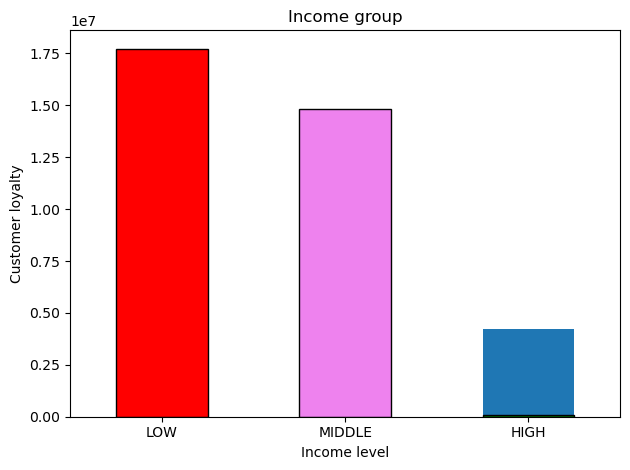

In [98]:
# Create a bar chart from the income group column
# Get value counts
opc['orders_day_of_week'].value_counts().sort_index().plot.bar()

# Label the axes
plt.xlabel('income group (0-Saturday, 6-Friday)')
plt.ylabel('Quantity')

# Define custom colors (must match number of bars)
custom_colors = ['red', 'violet', 'green']  # Add more if more bars

# Plot with custom bar colors
counts.plot.bar(
    color=custom_colors,
    edgecolor='black'
)

plt.title('Income group')
plt.xlabel('Income level')
plt.ylabel('Customer loyalty')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [99]:
opc['spending_flag'].unique()

array(['High spender', 'Low spender'], dtype=object)

In [100]:
opc['product_name'].unique()

array(['Soda', 'Organic Unsweetened Vanilla Almond Milk',
       'Original Beef Jerky', ..., 'Orange Energy Shots',
       'Zucchini Chips, Pesto', 'Hot Oatmeal Multigrain Raisin'],
      dtype=object)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10344\1941098722.py:11: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10344\1941098722.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


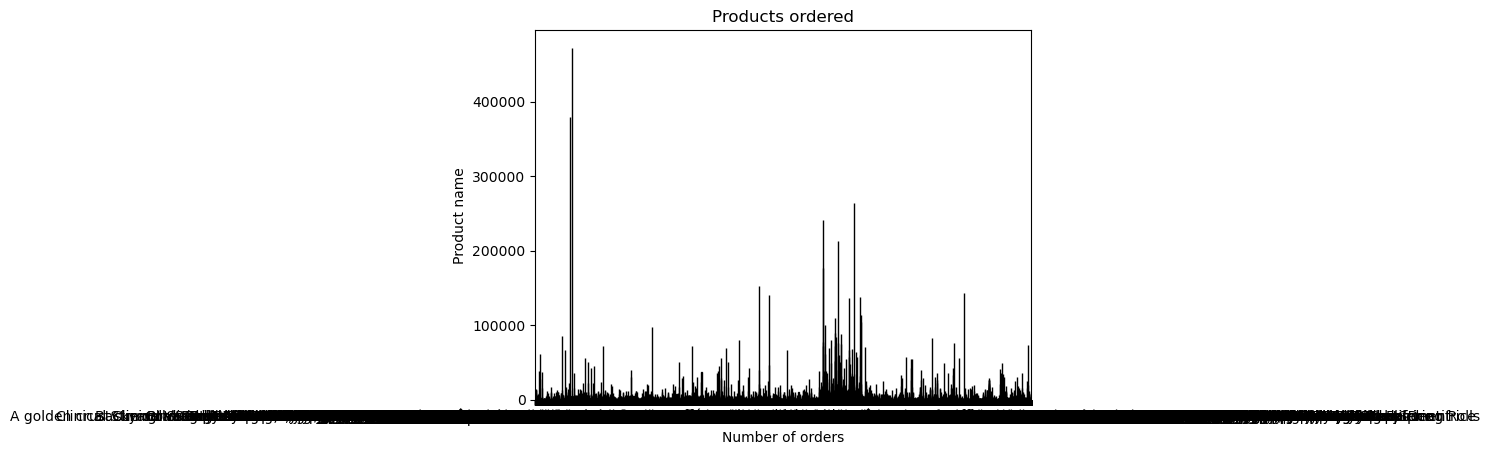

In [101]:
opc['product_name'].value_counts().sort_index().plot(
    kind='bar',
    color='steelblue',
    edgecolor='black'
)

plt.xlabel('Number of orders')
plt.ylabel('Product name')
plt.title('Products ordered')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [102]:
opc['department_id'].unique()

array([ 7., 16., 19., 17.,  4., 14., 13., nan, 20.,  1., 11., 12.,  6.,
        3., 15.,  9.,  5.,  8., 18.,  2., 21., 10.])

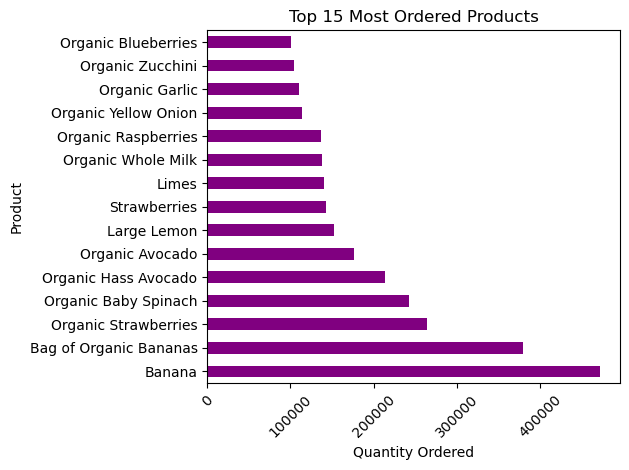

In [103]:
# Count product frequency
top_products = opc['product_name'].value_counts().nlargest(15)

# Plot
top_products.plot(kind='barh', color='purple')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.title('Top 15 Most Ordered Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [104]:
opc['price_range_loc'].unique()

array(['Mid-range product', 'Low-range product', nan,
       'High-range product'], dtype=object)

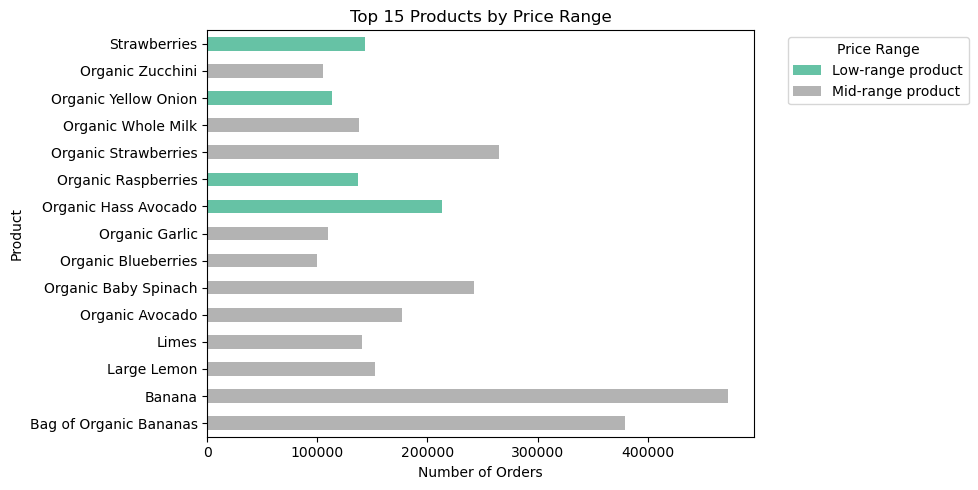

In [105]:
top_15 = opc['product_name'].value_counts().nlargest(15).index # Select the 15 top products
top_products_df = opc[opc['product_name'].isin(top_15)] # Filter on those products
grouped = top_products_df.groupby(['product_name', 'price_range_loc']).size().unstack(fill_value=0) # count how many time each price grp occurs

# Create the bar chart
grouped.plot(kind='barh', stacked=True, colormap='Set2', figsize=(10, 5))
plt.xlabel('Number of Orders')
plt.ylabel('Product')
plt.title('Top 15 Products by Price Range')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [106]:
opc['reordered'].unique()

array([ 0.,  1., nan])

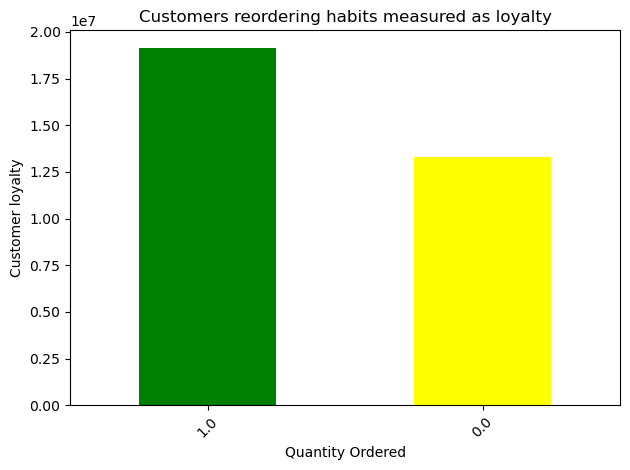

In [107]:
# Count product frequency
reordered_products = opc['reordered'].value_counts()

# Plot
reordered_products.plot(kind='bar', color=['green', 'yellow'])
plt.xlabel('Quantity Ordered')
plt.ylabel('Customer loyalty')
plt.title('Customers reordering habits measured as loyalty')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

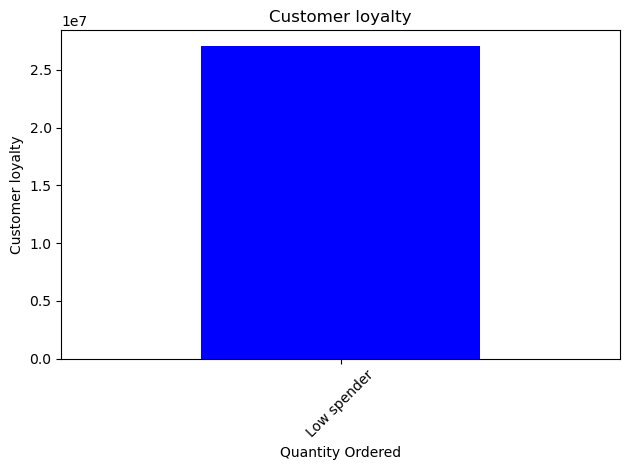

In [108]:
# Count product frequency
reordered_products = opc['loyalty_flag'].value_counts()

# Plot
reordered_products.plot(kind='bar', color=['blue', 'skyblue'])
plt.xlabel('Quantity Ordered')
plt.ylabel('Customer loyalty')
plt.title('Customer loyalty')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [109]:
opc['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

Text(0.5, 1.0, 'Order frequency per day distributed by hour')

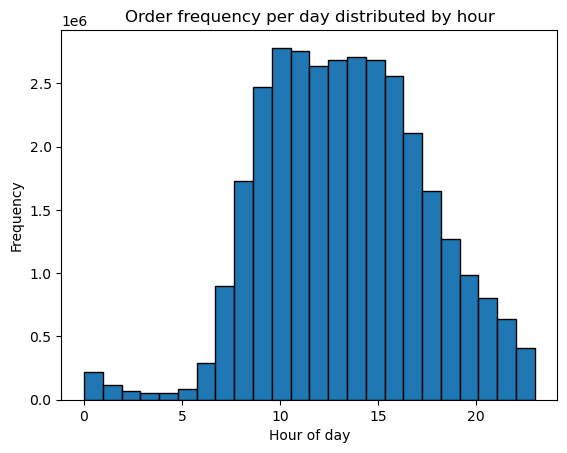

In [110]:
# Histogram with order of day values, showing how many orders are placed during different times.
opc['order_hour_of_day'].plot.hist(bins=24, edgecolor='black')

# Label the axes
plt.xlabel('Hour of day')
plt.ylabel('Frequency')

# Optional: add a title
plt.title('Order frequency per day distributed by hour')

In [114]:
opc.groupby(['fam_status', 'age']).size() # Group the fam status and age

fam_status        age
divorced/widowed  60     118047
                  61     135627
                  62     124911
                  63     136312
                  64     141370
                          ...  
single            55     135191
                  56     122983
                  57     129506
                  58     138939
                  59     135122
Length: 128, dtype: int64

In [115]:
opc['age_group'] = pd.cut(opc['age'], bins=[0, 25, 40, 60, 100],
                          labels=['<25', '25-40', '40-60', '60+']) # Creation of bins for age

In [118]:
order_dist = opc.groupby(['fam_status', 'age_group']).size().unstack(fill_value=0) # Group by fam status and age (count)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10344\3486907078.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_dist = opc.groupby(['fam_status', 'age_group']).size().unstack(fill_value=0) # Group by fam status and age (count)


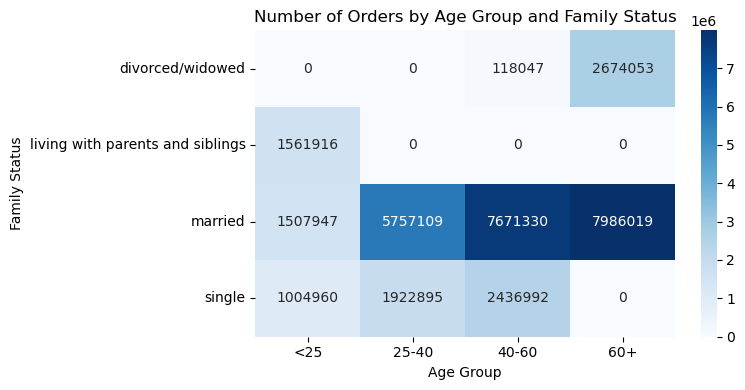

In [121]:
plt.figure(figsize=(8,4))  # Create the box plot
sns.heatmap(order_dist, annot=True, fmt='d', cmap='Blues')
plt.title('Number of Orders by Age Group and Family Status')
plt.ylabel('Family Status')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()